<h1><center>ALCX Price vs ALCX Accounts</center></h1>
<center>@Ryanl</center>

<center>How does the adoption of Alchemix impact price?</center>

<h2>Data</h2>
Using Flipside's VELOCITY database, I created an SQL query (https://app.flipsidecrypto.com/shareable/adoption-and-price-J6iI1y) which allowed me to grab the number of unique ALCX wallets and ALCX price over time ranging from March 27, 2021 - April 11, 2021. Data used in the following analysis is all **realtime data**, based on VELOCITY's database which updates daily. Downloading the notebook and running locally would yield different results than what is shown below, as more data would be available. 

<h2>Analysis</h2>
<h3>Imports</h3>

In [2]:
import urllib.request as rq
import json
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

The main library used for this analysis is sklearn's linear regression module which allowed me to run linear regressions between three variables: price, ALCX accounts and time. The below code was used to grab the data from Flipside's API which imports the data in JSON as a list of dictionaries which I then converted to a pandas dataframe.

In [3]:
url = 'https://api.flipsidecrypto.com/api/v2/queries/4bf360e8-97ad-490f-b147-7024dffb139f/data/latest'

try:
    dataset = rq.urlopen(url)
    dataset = dataset.read()
    dataset = json.loads(dataset)
    dataset = pd.DataFrame(dataset)
except Exception as e:
    print('Unable to get data from flipsidecrypto API. Check the URL below: \n{}'.format(url))


The next code block creates 3 additional series to the dataset: 
- change in price
- change in unique addresses
- incrementing integers that represent number of days after launch
These two series are used to plot the first figure below.

In [ ]:
#delta_price = [0]
#delta_addresses = [0]
ind = [0]
counter = 0
while counter < len(dataset)-1:
    ind.append(counter)
    dataset['BALANCE_DAY'][counter] = dataset['BALANCE_DAY'][counter].rsplit('T')[0]
    counter+=1
dataset['BALANCE_DAY'][counter] = dataset['BALANCE_DAY'][counter].rsplit('T')[0]
dataset['IND'] = ind

dataset['DELTA_PRICE'] = np.gradient(dataset['PRICE'])
dataset['DELTA_ADDRESSES'] = np.gradient(dataset['UNIQUE_ADDRESSES'])

#del delta_addresses, delta_price, counter, ind

This next block creates utilizes a linear regression module to analyze the relationship between a couple different sets of data.

In [15]:
x = dataset.iloc[:,3].values.reshape(-1,1)
y1 = dataset.iloc[:,1].values.reshape(-1,1)
y2 = dataset.iloc[:,2].values.reshape(-1,1)
x1_change = dataset.iloc[:,5].values.reshape(-1,1)
y1_change = dataset.iloc[:,4].values.reshape(-1,1)
linear_reg = LinearRegression()
linear_reg.fit(x1_change,y1_change)
y_pred = linear_reg.predict(x1_change)
linear_reg2 = LinearRegression()
linear_reg2.fit(x,y2)
y_pred2 = linear_reg2.predict(x)
lin_reag3 = LinearRegression()
lin_reag3.fit(y2,y1)
y_pred3 = lin_reag3.predict(y2)

<h3>ALCX Accounts vs Time</h3>
Below represents the number of accounts with respect to time. It is evident that ALCX is steadily gaining users, brought in by outside factors. However, this poses additional questions (outside of the scope of this analysis) relating to the variables that affect the increase in adoption.

*Is the price increase due to increase in accounts?*

From the graphs, we can see taht the price fluctuates with respect to the addition of new wallets, however the rate of new wallets is more consistent. In addition, the change in price/accounts of ALCX vs time, shows during a large price jump, the number of accounts also jumps. Unfortunately, there isn't enough data to say for sure which one influences the other more. 

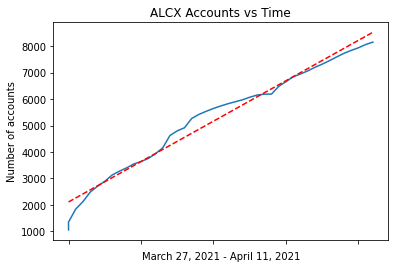

In [9]:
fig,ax = plt.subplots()
plt.plot(x,y2,label='accounts (USD)')
plt.plot(x,y_pred2,color='r',linestyle='dashed')
ax.axes.xaxis.set_ticklabels([])
plt.xlabel('March 27, 2021 - April 11, 2021')
plt.ylabel('Number of accounts')
plt.title('ALCX Accounts vs Time')
plt.show()

Figure 1 - ALCX Accounts over Time

In [10]:
print(metrics.r2_score(y2,y_pred2))

0.9731792743269163


**R-squared value of 0.97**
A very strong positive relationship between the amount of ALCX accounts over time shows that if continuing along current trends, adoption will continue to grow steadily. 

<h3>Change in Price/Unique Accounts of ALCX vs Time</h3>
See the following figure which shows the change in price and change in number of unique addresses with respect to time. From this graph, we can see that there is some correlation between the change in price and the change in unique accounts. From the graph, we can see that the maximas of the two series tend to line up, meaning that during a price surge, there will also be a jump in unique ALCX accounts.

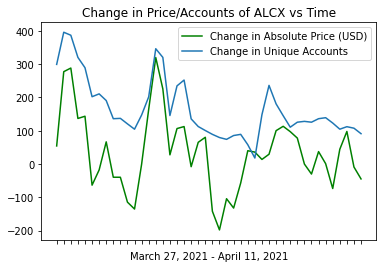

In [16]:
#plot
fig,ax = plt.subplots()
plt.plot(dataset['BALANCE_DAY'],dataset['DELTA_PRICE'],label='Change in Absolute Price (USD)',color='g')
plt.plot(dataset['BALANCE_DAY'],dataset['DELTA_ADDRESSES'],label='Change in Unique Accounts')
plt.legend(loc='best')
ax.axes.xaxis.set_ticklabels([])
plt.xlabel('March 27, 2021 - April 11, 2021')
plt.title('Change in Price/Accounts of ALCX vs Time')
plt.show()

Figure 2 - Change in Price/Change in accounts vs Time (ALCX)

To elaborate, the above figure only demonstrates the relationship between the deltas of price and unique accounts vs time. However, what we want to know is how these two variables relate to each other. 

<h3>Change in Price vs Unique Accounts of ALCX</h3>
The below code snippet prepares the data to be used in sklearn's linear regression model which requires data to be in numpy arrays. For graphing purposes, integer values were used to days (x axis) to simplify graphing and allow the data to fit in the regression model. Beginning at 0 for launch, and incrementing to the length of the data.

The below graph represents the price of ALCX vs the number of unique addresses.
From the below graph, we can see that the price of ALCX *tend* to increases with the amount of unique accounts. We can see near 3900 and 6000 accounts, there is a dip in price. However, we can see the overall trend of the data increase as the number of accounts.

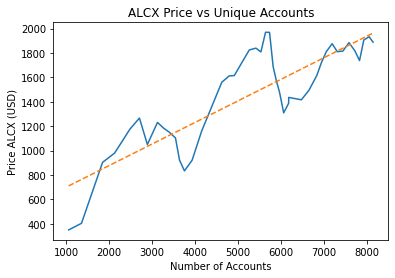

In [7]:
fig,ax = plt.subplots()
plt.plot(dataset['UNIQUE_ADDRESSES'],dataset['PRICE'],label='Unique Addresses')
plt.plot(y2,y_pred3,linestyle='dashed')
plt.xlabel('Number of Accounts')
plt.ylabel('Price ALCX (USD)')
plt.title('ALCX Price vs Unique Accounts')
plt.show()

Figure 3 - ALCX Price vs Unique Accounts

In [8]:
print(metrics.r2_score(y1,y_pred3))

0.7218622480566586


We can see from the data above, that roughly **72%** of the variance in absolute ALCX price can be explained by the total number of accounts. This means that ALCX price and unique accounts have a decently positive linear association. However, we are currently only looking at the larger picture. What does this mean with respect to their daily change?

<h3>Change in Price vs Change in Accounts (ALCX)</h3>
Below is a graph of the absolute change in price with respect to the absolute change in unique ALCX accounts. We can see from this graph, that there is much less linearity in the plot compared to the previous figures.

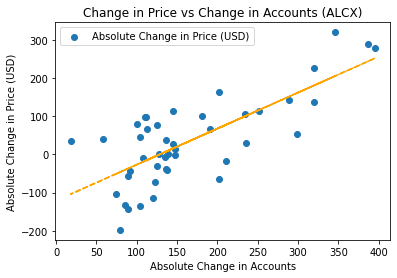

In [26]:
#plot
fig,ax = plt.subplots()
plt.scatter(x1_change,y1_change,label='Absolute Change in Price (USD)',marker='o')
plt.plot(x1_change,y_pred,color='orange',linestyle='dashed')
plt.legend(loc='best')
plt.xlabel('Absolute Change in Accounts')
plt.ylabel('Absolute Change in Price (USD)')
plt.title('Change in Price vs Change in Accounts (ALCX)')
plt.show()

Figure 4 - Change in Price vs Change in Accounts (ALCX)

In [23]:
print(metrics.r2_score(y1_change,y_pred))

0.5519855648988707


We can see that this relationship gives an R-squared value of **0.55** resulting in a positive association of 55%. This means that the *change* in accounts does not a have a large impact on the *change* in price of ALCX. This is interesting to note, but not surprising. This analysis only takes into account the price and adoption of ALCX. Countless other factors, most notably market trends, were not taken into account which most likely has a larger impact on the change in price. 

<h2>Conclusion</h2>
Since the launch of ALCX, we can see that there has been continuous strong adoption over time that seems to follow the predicted trends quite closely at 97% (Figure 1). As we relate this to price, the positive association between price and accounts is still decent at 72%. However, narrowing our scope even more, we can see that the change in price is only 55% affected by the change in accounts. This shows that as we narrow the scope of our data, we can see that the relationship grows weaker. This is due to the limitations of the scope of which this analysis was based. There are many other variables that would affect adoption as well as price. To name a few, media attention (Bounty question #13: ALCX & Twitter) and current market trends and comparison to other DeFi platforms are also needed to assess the full reasoning behind price changes. 